In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output
pd.set_option('display.float_format', '{:.6f}'.format) # Set the float format otherwise it will use the scientific way to display


In [4]:
df = pd.read_csv('data/listings.csv')
df_calendar = pd.read_csv('data/calendar.csv')
df_review = pd.read_csv('data/reviews.csv')

# Data Explore

In [5]:
# display the first 5 rows of the DataFrame to understand its structure
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20211028222535,2021-10-29,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,Tokyo,Would love to travel all over the world and me...,within a day,100%,100%,f,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1.000000,1.000000,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,NaN,Sumida Ku,NaN,35.717070,139.826080,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.000000,2.000000,"[""Shampoo"", ""Kitchen"", ""Essentials"", ""Microwav...","$11,000.00",3,365,3.000000,3.000000,365.000000,365.000000,3.000000,365.000000,NaN,t,28,58,88,363,2021-10-29,165,0,0,2012-09-25,2019-11-14,4.760000,4.730000,4.910000,4.830000,4.820000,4.510000,4.780000,M130003350,f,1,1,0,0,1.490000
1,776070,https://www.airbnb.com/rooms/776070,20211028222535,2021-10-29,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1.000000,1.000000,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Kita-ku, Tokyo, Japan",Kita Ku,NaN,35.738440,139.769170,Private room in residential home,Private room,2,NaN,1 shared bath,1.000000,1.000000,"[""Air conditioning"", ""Shampoo"", ""Iron"", ""Ether...","$7,950.00",3,14,3.000000,3.000000,14.000000,14.000000,3.000000,14.000000,NaN,t,27,48,65,245,2021-10-29,228,0,0,2013-09-17,2020-01-18,4.970000,4.960000,4.920000,4.970000,4.970000,4.840000,4.910000,M130000243,t,1,0,1,0,2.310000
2,1196177,https://www.airbnb.com/rooms/1196177,20211028222535,2021-10-29,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,"Adachi City, Tokyo, Japan",出身地 東京\r\n好きなこと 旅行､ﾃﾆｽ\r\n\r\nA host is the hu...,within a day,100%,NaN,t,https://a0.muscache.com/im/users/5686404/profi...,https://a0.muscache.com/im/users/5686404/profi...,Adachi District,2.000000,2.000000,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"足立区, 東京都, Japan",Adachi Ku,NaN,35.744750,139.797310,Private room in residential home,Private room,2,NaN,1 shared bath,1

In [6]:
df.shape

(10414, 74)

In [7]:
# There are too many columns, see columns available in this DataFrame
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
# only see columns that interest us
df_filtered = df[['id', 'name', 'host_id', 
       'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price',
       'minimum_nights','has_availability',
       'calendar_last_scraped', 'number_of_reviews',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'reviews_per_month']]
df_filtered.tail(3)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
10411,52974109,★36間部屋新築ホテル割引有月額7万★東上野Artsy Inn セミダブルルーム,31734605,KS Home,NaN,Taito Ku,35.711891,139.783498,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"$5,999.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
10412,52974300,★36間部屋新築ホテル割引有月額6万5★東上野 Artsy Inn シングルルーム,31734605,KS Home,NaN,Taito Ku,35.713552,139.783347,Entire serviced apartment,Entire home/apt,2,NaN,1.000000,1.000000,"$5,999.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
10413,53014539,"Entire140㎡ Big house,3floors,Shinjuku ,4mins t...",63598456,Spring,NaN,Shinjuku Ku,35.689559,139.717948,Entire residential home,Entire home/apt,16,NaN,6.000000,12.000000,"$25,714.00",1,t,2021-10-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN


In [9]:
# get info about the DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10414 non-null  int64  
 1   name                         10414 non-null  object 
 2   host_id                      10414 non-null  int64  
 3   host_name                    10386 non-null  object 
 4   neighbourhood                7756 non-null   object 
 5   neighbourhood_cleansed       10414 non-null  object 
 6   latitude                     10414 non-null  float64
 7   longitude                    10414 non-null  float64
 8   property_type                10414 non-null  object 
 9   room_type                    10414 non-null  object 
 10  accommodates                 10414 non-null  int64  
 11  bathrooms                    0 non-null      float64
 12  bedrooms                     9559 non-null   float64
 13  beds            

# Handle Irrelavant data

In [10]:
# columns where all values are the same (constant feature)
constant_features = [col for col in df_filtered.columns if df_filtered[col].nunique() == 1]
print('Constant Features: ', constant_features)

Constant Features:  []


In [11]:
# # There is not any constant features, thus nothing to drop at this moment. 
# # If there are any, can use the following to drop:
# df_no_constant_features = df_filtered.drop(columns=constant_features)

# Columns with mostly missing values (e.g. more than x% missing)
threshold = 20
print(f'Total records: {df_filtered.shape[0]}')
print('*' * 50)
for col in df_filtered.columns:
    missing_count = df_filtered[col].isnull().sum()
    missing_ratio = (missing_count / df_filtered.shape[0]) * 100
    if missing_ratio > threshold:
        print(f'Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%) ')
        print('*' * 50)

Total records: 10414
**************************************************
Column: neighbourhood has 2658 missing values (25.52%) 
**************************************************
Column: bathrooms has 10414 missing values (100.00%) 
**************************************************
Column: last_review has 2118 missing values (20.34%) 
**************************************************
Column: review_scores_rating has 2118 missing values (20.34%) 
**************************************************
Column: review_scores_accuracy has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_cleanliness has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_checkin has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_communication has 2129 missing values (20.44%) 
**************************************************
Column: review_scores_loca

In [12]:


# From above we can see that due to total count is 10414, columns such as neighbourhood has missing values that are more than 25%, 
# but neighbourhood_cleansed do not hold any missing values, it is possible that it gets clean by reading latitude and longitude values.
# There are also missing values on bedrooms, beds, we need to process the null values before analyzing. Most of the missing values are
# at the review score section (>20% missing ratio).
# For some reason, there is no bathroom info, so better ignore this column.
# Also remove neighbourhood column because neighbourhood_cleansed is better.

# df_filtered = df_filtered.drop(columns = ['bathrooms','neighbourhood'])
# Remove columns with more than x%
columns_to_drop = [col for col in df_filtered.columns if (df_filtered[col].isnull().sum() / df_filtered.shape[0]) * 100 > threshold]
df_filtered = df_filtered.drop(columns=columns_to_drop)

df_filtered.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,10414.000000,36115186.183503,10967576.988398,197677.000000,29699353.000000,38606899.000000,43718353.750000,53014539.000000
host_id,10414.000000,198893670.841751,117743424.394377,771694.000000,85022417.000000,210199913.000000,299176279.000000,428038217.000000
latitude,10414.000000,35.696715,0.041135,35.540970,35.685733,35.702615,35.719633,35.830640
longitude,10414.000000,139.736454,0.071668,139.095680,139.701300,139.732470,139.784980,139.911580
accommodates,10414.000000,4.182735,2.993691,0.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,9559.000000,1.440841,1.167330,1.000000,1.000000,1.000000,2.000000,40.000000
beds,9676.000000,2.670215,2.324449,1.000000,1.000000,2.000000,3.000000,56.000000
minimum_nights,10414.000000,3.818706,25.464387,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10414.000000,26.401575,43.849124,0.000000,1.000000,8.000000,33.000000,489.000000


In [13]:
# From above there is an abnormal value! 
# max of minimum nights - 999 is clearly larger than 365 days in a year
# Later better pay more attention to this column and process them when need

# host name is not an important factor. Drop it
df_filtered =  df_filtered.drop(columns=['host_name'])


Start to process DataFrame slightly - missing values

In [14]:
# Display the DataFrame having missing values
df_missing_data = df_filtered[df_filtered.isnull().any(axis=1)]

# df_missing_data

In [15]:
df_missing_data.tail()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,instant_bookable
10389,52822268,人気の新宿・浅築・ブリティッシュブルー・２人・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715450,139.699200,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10390,52822308,人気の新宿・浅築・モダンな和風グリーントーン・高田馬場駅から徒歩７分の好立地・高速Wifi・...,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10391,52822342,人気の新宿・浅築・モダンな和風 赤いトーン・高田馬場駅から徒歩７分の好立地・高速Wifi・長期割引,402335966,Shinjuku Ku,35.715462,139.699188,Entire rental unit,Entire home/apt,2,NaN,1.000000,"$10,000.00",1,t,2021-10-29,0,t
10399,52908934,long-term stays OK@JROtsukasta.5mins walk#3ppl,197405131,Toshima Ku,35.731130,139.734780,Entire rental unit,Entire home/apt,3,1.000000,NaN,"$4,240.00",1,t,2021-10-29,0,t
10400,52909995,JROtsuka 5min#Minimalist House#FreeWifi&Max3(402),197405131,Toshima Ku,35.729030,139.734570,Entire rental unit,Entire home/apt,3,1.000000,NaN,"$6,320.00",1,t,2021-10-29,0,t


In [16]:
# Investigate more on the missing values
df_filtered.isnull().sum()

id                          0
name                        0
host_id                     0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bedrooms                  855
beds                      738
price                       0
minimum_nights              0
has_availability            0
calendar_last_scraped       0
number_of_reviews           0
instant_bookable            0
dtype: int64

In [17]:

# process the missing data to fill them with 0
df_filtered.fillna({'bedrooms':0, 'beds':0},inplace=True)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10414 non-null  int64  
 1   name                    10414 non-null  object 
 2   host_id                 10414 non-null  int64  
 3   neighbourhood_cleansed  10414 non-null  object 
 4   latitude                10414 non-null  float64
 5   longitude               10414 non-null  float64
 6   property_type           10414 non-null  object 
 7   room_type               10414 non-null  object 
 8   accommodates            10414 non-null  int64  
 9   bedrooms                10414 non-null  float64
 10  beds                    10414 non-null  float64
 11  price                   10414 non-null  object 
 12  minimum_nights          10414 non-null  int64  
 13  has_availability        10414 non-null  object 
 14  calendar_last_scraped   10414 non-null

In [18]:
# Identify numerical and categorical columns
numerical_columns = df_filtered.select_dtypes(include=[np.number]).columns
categorical_columns = df_filtered.select_dtypes(include=['object','category']).columns
print("Numerical columns: ", numerical_columns)
print("Categorical columns: ", categorical_columns)

Numerical columns:  Index(['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bedrooms',
       'beds', 'minimum_nights', 'number_of_reviews'],
      dtype='object')
Categorical columns:  Index(['name', 'neighbourhood_cleansed', 'property_type', 'room_type', 'price',
       'has_availability', 'calendar_last_scraped', 'instant_bookable'],
      dtype='object')


In [19]:
# check if any missing numerical and categorical values
missing_numerical_columns = df_filtered[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
missing_categorical_columns = df_filtered[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print('Numerical columns with missing values: ', missing_numerical_columns.tolist())
print('Categorical columns with missing values: ', missing_categorical_columns.tolist())

Numerical columns with missing values:  []
Categorical columns with missing values:  []


# Start to handle abnormal data

In [20]:
# We noticed that price column have a dtype of "object" that suppose to be a number like float64.
# If price stays as object, then it would not be able to give us any insight such as mean price etc.
# Explore on price column
df_filtered['price']

0           $11,000.00
1            $7,950.00
2            $3,000.00
3           $32,571.00
4           $11,286.00
5           $28,886.00
6           $22,857.00
7            $4,000.00
8            $4,000.00
9           $10,286.00
10           $6,266.00
11           $6,266.00
12           $4,266.00
13           $4,266.00
14           $3,300.00
15           $3,300.00
16          $10,286.00
17           $4,000.00
18          $68,929.00
19          $12,000.00
20          $12,000.00
21          $27,000.00
22           $6,266.00
23           $4,266.00
24           $4,266.00
25           $4,266.00
26           $3,873.00
27           $4,500.00
28          $13,000.00
29          $22,000.00
30          $13,000.00
31           $6,729.00
32           $5,500.00
33           $4,500.00
34           $5,643.00
35           $4,500.00
36           $6,800.00
37           $5,000.00
38           $2,500.00
39           $3,800.00
40          $16,098.00
41          $15,000.00
42           $5,841.00
43         

In [21]:
# The reason why it is treated as object is due to the currency symbol as prefix. 
# Price also comes with comma as the separator for thousands.
# Also the currency symbol does not look correct, it should be Janpanese Yen (￥) instead of dollars.
# Convert this price column into a float64
df_filtered['price'] = df_filtered['price'].replace('[$,]','',regex=True).astype(np.float64)
df_filtered['price']

0         11000.000000
1          7950.000000
2          3000.000000
3         32571.000000
4         11286.000000
5         28886.000000
6         22857.000000
7          4000.000000
8          4000.000000
9         10286.000000
10         6266.000000
11         6266.000000
12         4266.000000
13         4266.000000
14         3300.000000
15         3300.000000
16        10286.000000
17         4000.000000
18        68929.000000
19        12000.000000
20        12000.000000
21        27000.000000
22         6266.000000
23         4266.000000
24         4266.000000
25         4266.000000
26         3873.000000
27         4500.000000
28        13000.000000
29        22000.000000
30        13000.000000
31         6729.000000
32         5500.000000
33         4500.000000
34         5643.000000
35         4500.000000
36         6800.000000
37         5000.000000
38         2500.000000
39         3800.000000
40        16098.000000
41        15000.000000
42         5841.000000
43        3

In [22]:
# check if there are any missing values
missing_numerical_columns = df_filtered[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print('Numerical columns with missing values: ', missing_numerical_columns.tolist())

Numerical columns with missing values:  []


In [23]:
# Price looks correct now as float64 data type.
# Now lets see some stats and whether if there are missing values
df_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10414.000000,36115186.183503,10967576.988398,197677.000000,29699353.000000,38606899.000000,43718353.750000,53014539.000000
host_id,10414.000000,198893670.841751,117743424.394377,771694.000000,85022417.000000,210199913.000000,299176279.000000,428038217.000000
latitude,10414.000000,35.696715,0.041135,35.540970,35.685733,35.702615,35.719633,35.830640
longitude,10414.000000,139.736454,0.071668,139.095680,139.701300,139.732470,139.784980,139.911580
accommodates,10414.000000,4.182735,2.993691,0.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10414.000000,1.322547,1.186270,0.000000,1.000000,1.000000,1.000000,40.000000
beds,10414.000000,2.480987,2.343000,0.000000,1.000000,2.000000,3.000000,56.000000
price,10414.000000,13458.874112,46670.563946,0.000000,4464.000000,7286.000000,12804.500000,2185000.000000
minimum_nights,10414.000000,3.818706,25.464387,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10414.000000,26.401575,43.849124,0.000000,1.000000,8.000000,33.000000,489.000000


In [24]:
# Count are all 10414 so no missing values. 
# By compare with previous stats, we also noticed that min is 0 for accommodates, price.
# Min is 0 for bedrooms and beds are due to we used 0 to fill missing values. Min is 0 for number of reviews is reasonable.
# Now have a look on rows that have a 0 of accommodates and price, separately.
df_filtered[df_filtered['accommodates'] == 0]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,instant_bookable
8088,44601406,Hotel Emit Shibuya,360981919,Shibuya Ku,35.664180,139.700060,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,19,f
9282,48873768,1min to Iriya Sta. Vessel Inn Ueno Iriya Station,394228369,Taito Ku,35.721855,139.787238,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9427,49354744,Residential Hotel BCONTE Asakusa,395690317,Taito Ku,35.713245,139.794159,Room in hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-28,0,f
9541,49888529,Quintessa Hotel Tokyo Ginza,402320953,Chuo Ku,35.670029,139.768555,Room in hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9547,49914832,Hotel Nihonbashi Saibo,402511398,Chuo Ku,35.685665,139.780365,Room in hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-28,1,f
9556,49937045,Sotetsu Fresa Inn Ochanomizu Jimbocho,402684029,Chiyoda Ku,35.695278,139.760452,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9557,49937123,Sotetsu Fressain Kanda Otemachi,402684354,Chiyoda Ku,35.690716,139.768448,Room in hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9558,49937209,Sotetsu Fresa Inn Tokyo Kanda,402685055,Chiyoda Ku,35.691723,139.774017,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9568,49992139,Sotetsu Fresa Inn Higashi Shinjuku Ekimae,403174933,Shinjuku Ku,35.698574,139.707901,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f
9569,49992291,Sotetsu Fresa Inn Ueno Okachimachi,403176111,Taito Ku,35.707912,139.772476,Room in boutique hotel,Hotel room,0,0.000000,0.000000,0.000000,1,t,2021-10-29,0,f


In [25]:
# By looking at the data above, these are all hotel rooms, with no bedrooms, no bed, no accommodates and no price.
# I want to treat this as abnormal values and get them remove.
df_filtered = df_filtered[df_filtered['accommodates'] != 0]

# Check on stats now
df_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10388.000000,36080960.134963,10959769.160181,197677.000000,29661396.750000,38560503.500000,43707752.750000,53014539.000000
host_id,10388.000000,198386271.592992,117451648.407664,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10388.000000,35.696774,0.041132,35.540970,35.685806,35.702645,35.719670,35.830640
longitude,10388.000000,139.736389,0.071729,139.095680,139.701220,139.732350,139.784990,139.911580
accommodates,10388.000000,4.193204,2.990103,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10388.000000,1.325857,1.185905,0.000000,1.000000,1.000000,1.000000,40.000000
beds,10388.000000,2.487197,2.342637,0.000000,1.000000,2.000000,3.000000,56.000000
price,10388.000000,13492.560166,46724.074664,825.000000,4499.500000,7300.000000,12857.000000,2185000.000000
minimum_nights,10388.000000,3.825760,25.495846,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10388.000000,26.462360,43.885912,0.000000,1.000000,9.000000,33.000000,489.000000


In [26]:
# Looks like fixing the accommodates abnormal values also erase the problem with price is zero issue.
# Lets look at some columns that have 0 as bedrooms and beds.
df_bd0 = df_filtered[df_filtered['beds'] == 0]
df_bdr0 = df_filtered[df_filtered['bedrooms'] == 0]
df_bdnr0 = df_filtered[(df_filtered['bedrooms'] == 0) | (df_filtered['beds'] == 0)]
df_bd0.shape

(712, 17)

In [27]:
df_bdr0.shape

(829, 17)

In [28]:
df_bdnr0.shape

(1467, 17)

In [29]:
# There are 712 rows without a bed and 829 rows without a bedroom.
# 1467 listings are either without a bedroom or a bed
# Check on room_type of them
# Then get stats on accommodates, bedrooms, beds, price
df_bd0['room_type'].value_counts()


room_type
Entire home/apt    413
Private room       256
Shared room         24
Hotel room          19
Name: count, dtype: int64

In [30]:
df_bd0[['accommodates', 'bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,712.000000,3.558989,2.585125,1.000000,2.000000,3.000000,4.000000,16.000000
bedrooms,712.000000,1.198034,1.134473,0.000000,1.000000,1.000000,1.000000,21.000000
beds,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,712.000000,10475.115169,14435.682196,1257.000000,3924.750000,6058.500000,10000.000000,150000.000000


In [31]:
df_bd0[df_bd0['room_type'] == 'Entire home/apt'][['accommodates','bedrooms', 'beds', 'price']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
accommodates,413.000000,4.092010,2.664265,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,413.000000,1.184019,0.878567,0.000000,1.000000,1.000000,1.000000,5.000000
beds,413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
price,413.000000,10365.617433,13741.627656,1833.000000,4254.000000,6500.000000,10086.000000,115000.000000


In [32]:
df_bdr0['room_type'].value_counts()

room_type
Entire home/apt    755
Private room        56
Hotel room          18
Name: count, dtype: int64

In [33]:
df_bdr0[['accommodates', 'bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,829.000000,2.975875,1.518611,1.000000,2.000000,3.000000,4.000000,16.000000
bedrooms,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beds,829.000000,1.691194,1.076172,0.000000,1.000000,2.000000,2.000000,10.000000
price,829.000000,11685.252111,51440.045365,1500.000000,4165.000000,6000.000000,8571.000000,999999.000000


In [34]:
df_bdr0[df_bdr0['room_type'] == 'Entire home/apt'][['accommodates','bedrooms', 'beds', 'price']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,755.000000,2.866225,1.374979,1.000000,2.000000,2.000000,3.000000,16.000000
bedrooms,755.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beds,755.000000,1.617219,0.976091,0.000000,1.000000,2.000000,2.000000,10.000000
price,755.000000,11026.905960,49991.205265,2000.000000,4147.000000,5940.000000,8107.000000,999999.000000


In [35]:
# Maybe in Japan they use Tatami or something to sleep and they do not treat those as beds.
# Most room types are either 1 private room or an entire home/apt. 
# Here I choose to replace Private room, Hotel room and Shared room's bedroom and beds with 1 if bedroom or beds is 0.
# And to replace Entire home/apt's bedrooms and beds to the mean values of bedrooms and beds with 0 as bedroom or beds, which is 1 and 2.

# We can also try to fill these values with mean, median, mode etc. 
# for example df_filled_mean = df.fillna(df.mean(numeric_only = True))
# Fill with mode (all columns) .iloc[0] is used to get the first mode if there are multiple modes for a given column
# for example df_filled_mode = df.fillna(df.mode().iloc[0])

mask = (
    df_filtered['room_type'].isin(['Private room', 'Hotel room', 'Shared room']) &
    (df_filtered['bedrooms'] == 0)
)
df_filtered.loc[mask, ['bedrooms']] = 1

mask = (
    df_filtered['room_type'].isin(['Private room', 'Hotel room', 'Shared room']) &
    (df_filtered['beds'] == 0)
)
df_filtered.loc[mask, ['beds']] = 1

mask = (
    df_filtered['room_type'].isin(['Entire home/apt']) &
    (df_filtered['bedrooms'] == 0)
)
df_filtered.loc[mask, ['bedrooms']] = 1

mask = (
    df_filtered['room_type'].isin(['Entire home/apt']) &
    (df_filtered['beds'] == 0)
)
df_filtered.loc[mask, ['beds']] = 2

df_filtered.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,10388.000000,36080960.134963,10959769.160181,197677.000000,29661396.750000,38560503.500000,43707752.750000,53014539.000000
host_id,10388.000000,198386271.592992,117451648.407664,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10388.000000,35.696774,0.041132,35.540970,35.685806,35.702645,35.719670,35.830640
longitude,10388.000000,139.736389,0.071729,139.095680,139.701220,139.732350,139.784990,139.911580
accommodates,10388.000000,4.193204,2.990103,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10388.000000,1.405660,1.126133,1.000000,1.000000,1.000000,1.000000,40.000000
beds,10388.000000,2.595495,2.263908,1.000000,1.000000,2.000000,3.000000,56.000000
price,10388.000000,13492.560166,46724.074664,825.000000,4499.500000,7300.000000,12857.000000,2185000.000000
minimum_nights,10388.000000,3.825760,25.495846,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10388.000000,26.462360,43.885912,0.000000,1.000000,9.000000,33.000000,489.000000


## handle outliers

<Axes: >

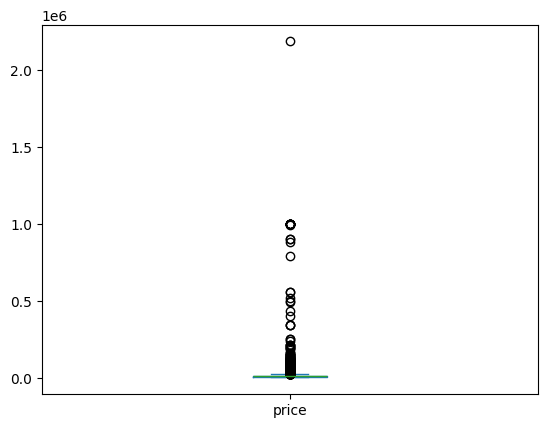

In [36]:
# plot price

df_filtered['price'].plot.box()

In [37]:
# Let's see the extreme point there
df_filtered[df_filtered['price'] > 1.5e6]

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,instant_bookable
4797,37142637,Good location for Tokyo trip ! max8+homewifi!#DK1,278854102,Nakano Ku,35.710650,139.689430,Entire rental unit,Entire home/apt,8,1.000000,1.000000,2185000.000000,1,t,2021-10-29,9,t


In [38]:
# see reviews of this id
df_calendar[df_calendar['listing_id'] == 37142637].head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1732244,37142637,2021-10-29,f,"$2,185,000.00","$2,185,000.00",1.000000,30.000000
1732245,37142637,2021-10-30,f,"$2,185,000.00","$2,185,000.00",1.000000,30.000000
1732246,37142637,2021-10-31,f,"$2,185,000.00","$2,185,000.00",1.000000,30.000000
1732247,37142637,2021-11-01,f,"$2,185,000.00","$2,185,000.00",1.000000,30.000000
1732248,37142637,2021-11-02,f,"$2,185,000.00","$2,185,000.00",1.000000,30.000000


In [39]:
# see reviews of this id
df_calendar[df_calendar['listing_id'] == 37142637].tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1732604,37142637,2022-10-24,f,"$23,000.00","$23,000.00",1.000000,30.000000
1732605,37142637,2022-10-25,f,"$23,000.00","$23,000.00",1.000000,30.000000
1732606,37142637,2022-10-26,f,"$23,000.00","$23,000.00",1.000000,30.000000
1732607,37142637,2022-10-27,f,"$23,000.00","$23,000.00",1.000000,30.000000
1732608,37142637,2022-10-28,f,"$23,000.00","$23,000.00",1.000000,30.000000


In [40]:
df_review[df_review['listing_id'] == 37142637]

,listing_id,id,date,reviewer_id,reviewer_name,comments
228661,37142637,564962912,2019-11-17,42503067,Yukari,立地もｱﾒﾆﾃｨも素晴らしかった上に､Daiki様にはとても丁寧に対応をしていただけました｡...
228662,37142637,568080737,2019-11-24,109194943,中村,お部屋はとても清潔感があり､過ごしやすかったです｡また､素早いﾚｽﾎﾟﾝｽをいただき安心して...
228663,37142637,571294104,2019-12-01,112120936,Ethan,"Very clean, Very great location and wonderful ..."
228664,37142637,574991110,2019-12-09,224171740,Mingyu,Everything was perfect.
228665,37142637,576270814,2019-12-13,313064947,경빈,아파트인줄 알았는데 멘션이더라구요.. 그래도 나름 잘 지내다 가요
228666,37142637,577051259,2019-12-15,238905024,紘史,駅から本当に近い住宅街にありました｡ﾜﾝﾙｰﾑが一つと大きな部屋が一つあり､大きな部屋はまる...
228667,37142637,590249203,2020-01-08,120163807,Herman,"Very nice and warming host, reachable in anyti..."
228668,37142637,597500109,2020-01-25,125066501,翠英,"很不错,干净,交通方便!"
228669,37142637,612139059,2020-02-29,61476916,Monett,"Place was great and comfortable, easy access t..."


<Axes: >

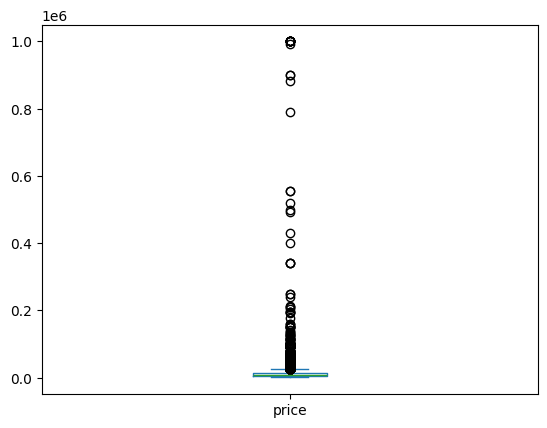

In [41]:
# From above feel like this is just some random property that is not currently available, can get this outlier out of the dataset

df_filtered = df_filtered[df_filtered['id'] != 37142637]
df_filtered['price'].plot.box()

In [42]:
# Grab outliers because outliers are the extreme value or significantly different from other values in the dataset
# In regression analysis, outliers can lead to inaccurate and unreliable prediction results.
# Therefore, handling outliers is necessary in regression analysis.
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 0.25)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 2)

    return lower_limit, upper_limit

In [43]:
# Find lower and upper limit for target
feature = "price"
lower, upper = find_outliers_IQR_method(df_filtered, feature)
lower, upper

(np.float64(2409.5), np.float64(29573.0))

In [44]:
# Remove outliers

df_cleaned = df_filtered[(df_filtered[feature] > lower) & (df_filtered[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count: {len(df_filtered) - len(df_cleaned)}')

Cleaned dataset : (9383, 17)
Outliers count: 1004


((array([-3.79483804, -3.56880489, -3.44467022, ...,  3.44467022,
          3.56880489,  3.79483804]),
  array([ 2416.,  2418.,  2431., ..., 29286., 29558., 29558.])),
 (np.float64(5449.261702690699),
  np.float64(8996.789406373226),
  np.float64(0.9296820293805186)))

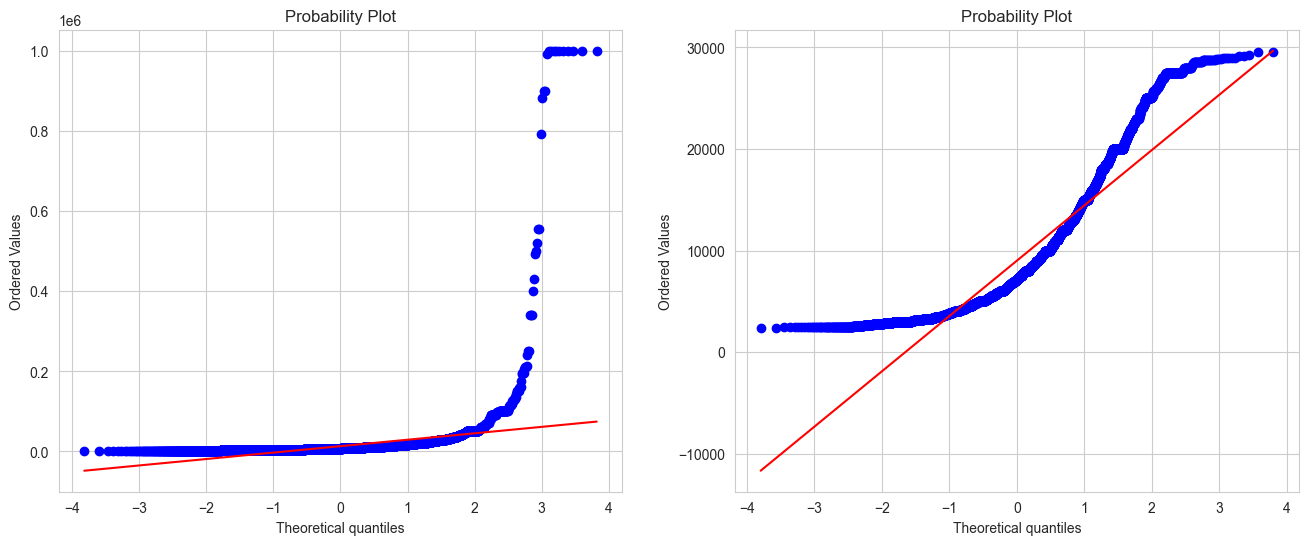

In [45]:
# Plot price and see if we can find any insight
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_filtered[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature], plot=plt)

In [46]:
# From the plot we see maybe LQR method is not too good for this dataset. 
# We maybe only need to remove the only 1 extreme outlier but not around 420 rows of data, 
# even with the different LQR factor defined.

# try Z-score method:
def find_outliers_ZScore_method(input_df, variable):
    df_z_scores = input_df.copy()

    # Calculate Z-scores for the specified variable droping any rows having NaN values
    z_scores = np.abs(stats.zscore(input_df[variable].dropna()))

    # Add Z-scores as a new column
    df_z_scores[variable + '_Z'] = z_scores

    return df_z_scores

In [47]:
# Calculate Z-scores
df_z_scores = find_outliers_ZScore_method(df_filtered.copy(), feature)
df_z_scores.head()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,has_availability,calendar_last_scraped,number_of_reviews,instant_bookable,price_Z
0,197677,Oshiage Holiday Apartment,964081,Sumida Ku,35.717070,139.826080,Entire rental unit,Entire home/apt,4,1.000000,2.000000,11000.000000,3,t,2021-10-29,165,f,0.054915
1,776070,Kero-kero house room 1,801494,Kita Ku,35.738440,139.769170,Private room in residential home,Private room,2,1.000000,1.000000,7950.000000,3,t,2021-10-29,228,t,0.128263
2,1196177,Stay with host Cozy private room Senju area,5686404,Adachi Ku,35.744750,139.797310,Private room in residential home,Private room,2,1.000000,2.000000,3000.000000,2,t,2021-10-29,95,f,0.247302
3,1249571,Unique stay! New&1min to the subway,6809418,Shibuya Ku,35.651110,139.721650,Entire residential home,Entire home/apt,3,1.000000,1.000000,32571.000000,4,t,2021-10-29,102,f,0.463835
4,1298200,Pine House 2 Bed Room + 2 Toilets,6606987,Katsushika Ku,35.738500,139.851670,Entire residential home,Entire home/apt,4,2.000000,4.000000,11286.000000,4,t,2021-10-29,339,t,0.048037


In [48]:
df_z_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10387.000000,36080857.922884,10960291.818344,197677.000000,29660434.500000,38560527.000000,43710570.500000,53014539.000000
host_id,10387.000000,198378524.617888,117454648.401190,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10387.000000,35.696772,0.041134,35.540970,35.685802,35.702640,35.719670,35.830640
longitude,10387.000000,139.736393,0.071731,139.095680,139.701244,139.732350,139.785000,139.911580
accommodates,10387.000000,4.192837,2.990014,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10387.000000,1.405699,1.126181,1.000000,1.000000,1.000000,1.000000,40.000000
beds,10387.000000,2.595648,2.263963,1.000000,1.000000,2.000000,3.000000,56.000000
price,10387.000000,13283.500048,41584.688677,825.000000,4499.000000,7300.000000,12857.000000,1000000.000000
minimum_nights,10387.000000,3.826033,25.497059,1.000000,1.000000,1.000000,2.000000,999.000000
number_of_reviews,10387.000000,26.464042,43.887690,0.000000,1.000000,9.000000,33.000000,489.000000


In [49]:
# Remove outliers where |Z| > mean
df_z_score_cleaned = df_z_scores[df_z_scores[feature+'_Z'] < df_z_scores[feature+'_Z'].mean()]

print(f'Cleaned dataset : {df_z_score_cleaned.shape}')
print(f'Outliers count: {len(df_z_scores) - len(df_z_score_cleaned)}')

Cleaned dataset : (8927, 18)
Outliers count: 1460


((array([-3.78245965, -3.55573007, -3.43118022, ...,  3.43118022,
          3.55573007,  3.78245965]),
  array([ 2705.,  2705.,  2705., ..., 23800., 23800., 23857.])),
 (np.float64(4666.973549746773),
  np.float64(8495.10877114372),
  np.float64(0.9432592153269468)))

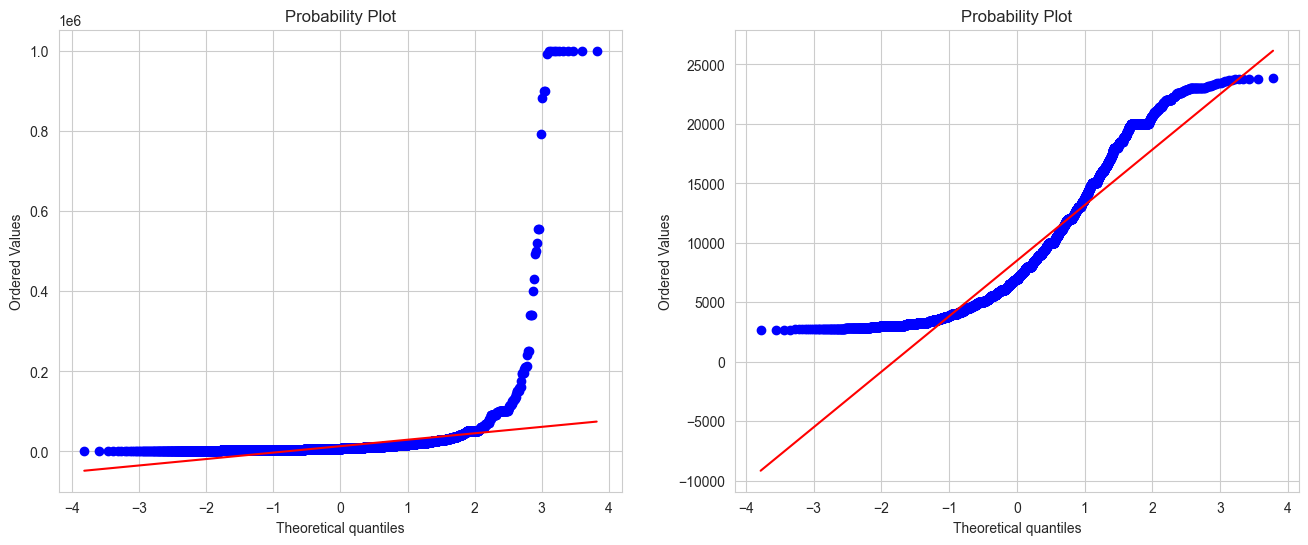

In [50]:
# Plot price and see if we can find any insight
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
stats.probplot(df_z_scores[feature], plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(df_z_score_cleaned[feature], plot=plt)

In [51]:
# Plot is very similar to the outcome of LQR method.
# Maybe just leave as it is due to different standard of airbnb holds different price is understandable.

<Axes: >

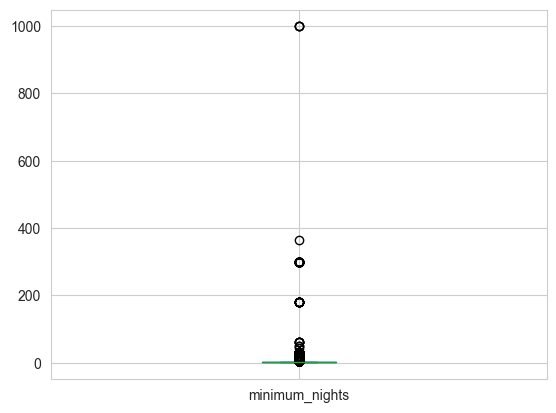

In [52]:
# Start to have a look on the abnormal value at minimum_nights column
# Can use a graph to investigate on values in this column
df_filtered['minimum_nights'].plot.box()

<Axes: >

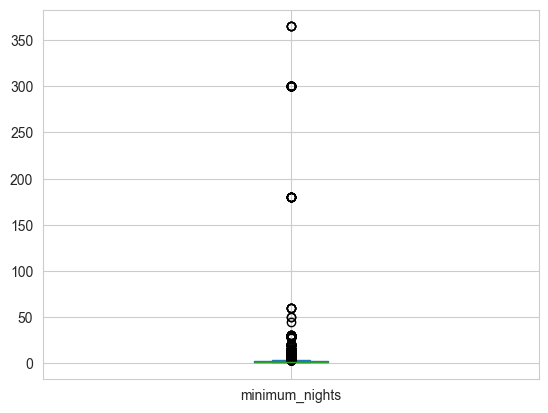

In [53]:
# look like not much values are abnormal, we can process this to 365 days instead
df_filtered.loc[df_filtered['minimum_nights'] > 365, 'minimum_nights'] = 365

df_filtered['minimum_nights'].plot.box()

In [54]:
# Looks better now
df_filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10387.000000,36080857.922884,10960291.818344,197677.000000,29660434.500000,38560527.000000,43710570.500000,53014539.000000
host_id,10387.000000,198378524.617888,117454648.401190,771694.000000,84889989.000000,209587496.000000,297536882.000000,428038217.000000
latitude,10387.000000,35.696772,0.041134,35.540970,35.685802,35.702640,35.719670,35.830640
longitude,10387.000000,139.736393,0.071731,139.095680,139.701244,139.732350,139.785000,139.911580
accommodates,10387.000000,4.192837,2.990014,1.000000,2.000000,3.000000,5.000000,16.000000
bedrooms,10387.000000,1.405699,1.126181,1.000000,1.000000,1.000000,1.000000,40.000000
beds,10387.000000,2.595648,2.263963,1.000000,1.000000,2.000000,3.000000,56.000000
price,10387.000000,13283.500048,41584.688677,825.000000,4499.000000,7300.000000,12857.000000,1000000.000000
minimum_nights,10387.000000,3.642919,20.041879,1.000000,1.000000,1.000000,2.000000,365.000000
number_of_reviews,10387.000000,26.464042,43.887690,0.000000,1.000000,9.000000,33.000000,489.000000


Start to see whether if need to handle duplicate

In [55]:
# Investigate on duplicated values
for col in df_filtered.columns:
    duplicated_count = df_filtered[col].duplicated().sum()
    print(f'Column: {col}')
    print(f'Duplicate Count: {duplicated_count}')
    print('*' * 50)

# # If need to identify duplicate records by multiple columns, use the following.
# # Do not apply in this case that we are analyzing
# duplicate_multi_cols = df_filtered[
#     df_filtered.duplicated(
#         subset = ['bedrooms','beds'],
#         keep=False
#     )
# ]

# duplicate_multi_cols.shape
# duplicate_multi_cols.sort_values('bedrooms').head(5)

# # Remove duplicate rows from the DataFrame considering all columns
# remove_duplicates_all_cols = df_filtered.drop_duplicates()

# # Remove duplicates based on columns
# remove_duplicate_multi_cols = df_filtered.drop_duplicates(
#     subset=['bedrooms','beds'],
#     keep='first' # Keep the first record, otherwise all duplicates will be gone. Can define first or last here
# )
# remove_duplicate_multi_cols.shape

Column: id
Duplicate Count: 0
**************************************************
Column: name
Duplicate Count: 800
**************************************************
Column: host_id
Duplicate Count: 7809
**************************************************
Column: neighbourhood_cleansed
Duplicate Count: 10338
**************************************************
Column: latitude
Duplicate Count: 4030
**************************************************
Column: longitude
Duplicate Count: 3195
**************************************************
Column: property_type
Duplicate Count: 10321
**************************************************
Column: room_type
Duplicate Count: 10383
**************************************************
Column: accommodates
Duplicate Count: 10371
**************************************************
Column: bedrooms
Duplicate Count: 10368
**************************************************
Column: beds
Duplicate Count: 10362
*************************************************

In [56]:
# For this dataset that we are dealing with, check whether if there are any duplicate of all columns
duplicate_rows = df_filtered[df_filtered.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, name, host_id, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bedrooms, beds, price, minimum_nights, has_availability, calendar_last_scraped, number_of_reviews, instant_bookable]
Index: []


In [57]:
# So there're no duplicate of all columns which is good.

## Pandas Profile Report

In [ ]:
# We have the option to do the following to create a report, just list this option here
# from ydata_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df, title = "Profiling Report")
# profile.to_file('ProfilingReport.html')
# profile.to_file('ProfilingReport.json')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
